# Advertising Sales Channel Prediction

Description:
    
    When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored. 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
#Importing the data
df=pd.read_csv('advertising.csv')

In [69]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [70]:
#removing the first column as it contains serial no. only.
df.drop(df.columns[0],inplace=True,axis=1)

In [71]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The dataset contains detailed study of TV, radio and newspaper channel. The target is to predict the sales.

In [72]:
#Cheking data type of the columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the columns are of float type and continuous in nature.

In [73]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

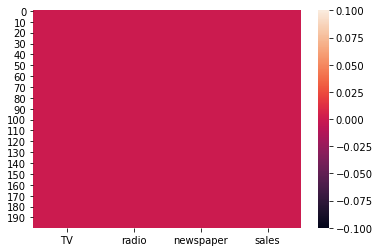

In [74]:
sns.heatmap(df.isnull())

There are no null values in our data.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are total 200 entries(rows) and 4 columns.

# Data visualization

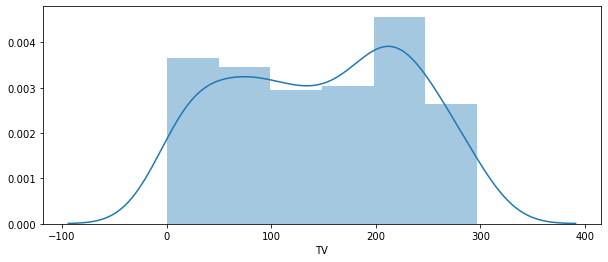

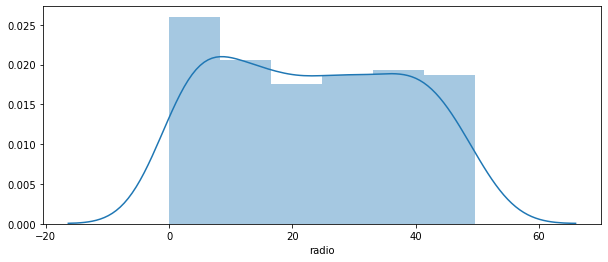

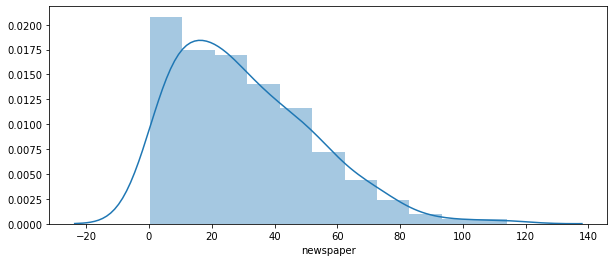

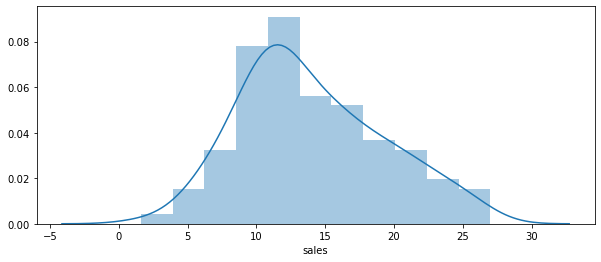

In [76]:
#Checking distribution of the data
for i in df.columns:
    plt.figure(figsize=(10,4))
    sns.distplot(df[i],kde=True)
    plt.show()

TV and radio have uniform distribution.

Newspaper is left skewed.

Sales or the target variable have normal distribution.

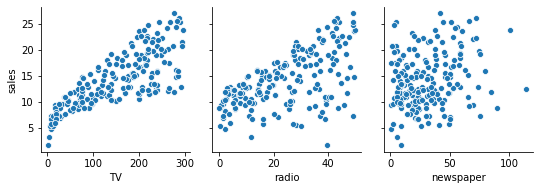

In [77]:
#Lets check the relationship between the independent variables and the dependent variable.
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='scatter')
plt.show()

TV has strong +ve linear relation with sales.

Radio have weak +ve linear relation with sales.

Newspaper have very weak relation with sales.

In [78]:
#Describing the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There is a lagre difference between 75 percentile and max in newspaper column.

Minimum for radio is 0.

Minimun sale is 1.6 and maximum sale is 27.


In [79]:
#Checking correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


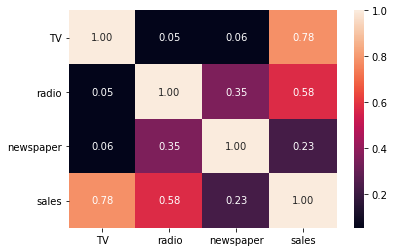

In [80]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

TV have high +ve correlation with sales.

Radio is also positively correlated with sales.

Newspaper have least +ve correlation with sales.

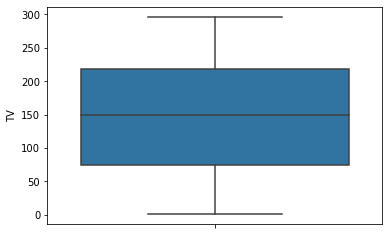

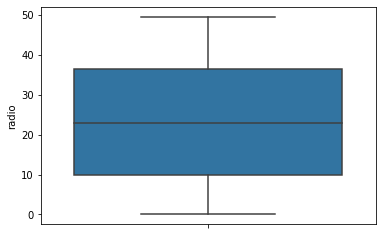

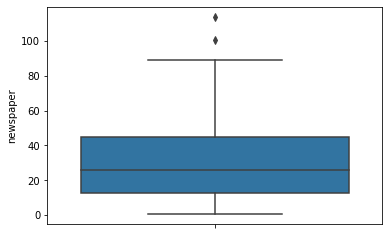

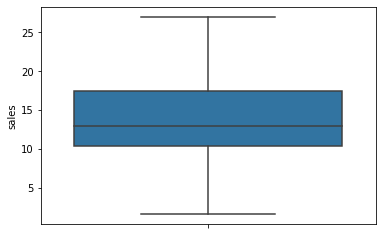

In [81]:
#Checking outliers
for i in df.columns:
    sns.boxplot(df[i],orient='v')
    plt.show()

Only newspaper have outliers which are close to the maximum therefore we will keep them.

In [82]:
#Checking the skewness 
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Keeping +/- 0.5 as the range for skewness, newspaper is the only column which have skewness.

In [83]:
#Removing skewness from newspaper column
#df['newspaper']=np.cbrt(df['newspaper'])

In [84]:
x=df.iloc[:,:-1]

In [89]:
y=df.iloc[:,-1]

In [85]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [86]:
#Applying cube root method to remove skewness
x['newspaper']=np.cbrt(x['newspaper'])

In [87]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.265522
dtype: float64

Now our data is within the range of skewness.

In [90]:
x.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,2.920515
std,85.854236,14.846809,0.814620
min,0.700000,0.000000,0.669433
25%,74.375000,9.975000,2.336152
50%,149.750000,22.900000,2.952959
75%,218.825000,36.525000,3.559526
max,296.400000,49.600000,4.848808


In [92]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler

In [94]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [96]:
x=pd.DataFrame(x,columns=['TV','radio','newspaper'])

In [97]:
x.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.458330
1,-1.197376,1.082808,0.786398
2,-1.516155,1.528463,1.460762
3,0.052050,1.217855,1.183210
4,0.394182,-0.841614,1.180486


In [98]:
x.shape,y.shape

((200, 3), (200,))

# Finding the best random state

In [111]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()

In [105]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.9066631145953776
At random state 0 Testing accuracy is: 0.8597494331444464


At random state 1 Training accuracy is: 0.8961289696475798
At random state 1 Testing accuracy is: 0.8916937124455175


At random state 2 Training accuracy is: 0.9156657036294288
At random state 2 Testing accuracy is: 0.7535114569076664


At random state 3 Training accuracy is: 0.8933259581677785
At random state 3 Testing accuracy is: 0.911945178693512


At random state 4 Training accuracy is: 0.8912406887203768
At random state 4 Testing accuracy is: 0.9082911754058118


At random state 5 Training accuracy is: 0.895657745419981
At random state 5 Testing accuracy is: 0.8986236522279739


At random state 6 Training accuracy is: 0.8918472940079688
At random state 6 Testing accuracy is: 0.920541030646887


At random state 7 Training accuracy is: 0.8929302060865691
At random state 7 Testing accuracy is: 0.9095038453273251


At random state 8 Training accuracy is: 0.908603669

At random state 45 we are getting the best result. Therefore we will split our train and test data at random state 45.

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [107]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [112]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training accuracy is:', r2_score(y_train,pred_train))
print('Testing accuracy is:',r2_score(y_test,pred_test))
print('mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_test)))

Training accuracy is: 0.89581436069956
Testing accuracy is: 0.895129731927936
mean absolute error: 1.0851144962312467
Root mean squared error: 1.5054577851936717


Cross validation of the model:

In [117]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f'At cross fold {i} the cv score is {cv_mean} and accuracy score for training is',r2_score(y_train,pred_train),'and accuracy score for testing is',r2_score(y_test,pred_test))
    print('\n')

At cross fold 2 the cv score is 0.8920092031994491 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 3 the cv score is 0.8915648402361449 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 4 the cv score is 0.8905494437145037 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 5 the cv score is 0.8875169847116584 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 6 the cv score is 0.8900952170929292 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 7 the cv score is 0.8862845334678031 and accuracy score for training is 0.89581436069956 and accuracy score for testing is 0.895129731927936


At cross fold 8 the cv score is 0.8827383042571338 and acc

we will selected cv=4.

The model is performing good as their is no much difference in training and testing score.

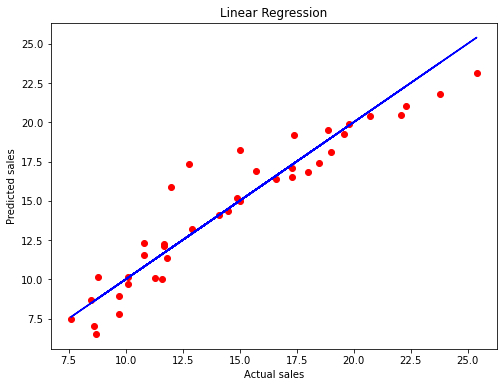

In [118]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Linear Regression')
plt.show()

Best fit line is covering most of the datapoints which shows a good fit.

Regularization:

In [120]:
from sklearn.model_selection import GridSearchCV
#Lasso

parameters={'alpha':[.0001,.001,.01,.1,1],'random_state':list(range(0,100))}
clf=GridSearchCV(ls,parameters,cv=4)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [122]:
ls=Lasso(alpha=.01,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print('r2 score is :',r2_score(y_test,pred_ls))
cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()
print('cv score mean is:',cv_mean)

r2 score is : 0.8958180488433094
cv score mean is: 0.8906940178789465


In [123]:
#Rigde
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8958143606992394

In [ ]:
#Their is no improvement in accuracy by regularization method.

In [127]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print('Training accuracy for kernel',i,' is:', r2_score(y_train,pred_train))
    print('Testing accuracy for kernel',i,'is:',r2_score(y_test,pred_test))
    cv_score=cross_val_score(sv,x,y,cv=4)
    cv_mean=cv_score.mean()
    print('cv score mean is:',cv_mean)
    print('\n')

Training accuracy for kernel linear  is: 0.8875347631479351
Testing accuracy for kernel linear is: 0.9033976760634093
cv score mean is: 0.8789801434297428


Training accuracy for kernel poly  is: 0.8257917154183891
Testing accuracy for kernel poly is: 0.6773930247564398
cv score mean is: 0.7570475762052021


Training accuracy for kernel rbf  is: 0.9176383510020985
Testing accuracy for kernel rbf is: 0.975991706075347
cv score mean is: 0.8967038676931092




SVR is not a good model for our data.

Ensemble technique:

In [128]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [134]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
model=[rf,ada]

for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    print('Training accuracy for  is:', r2_score(y_train,pred_train))
    print('Testing accuracy for is:',r2_score(y_test,pred_test))
    print('\n')

RandomForestRegressor()
Training accuracy for  is: 0.9965519867594032
Testing accuracy for is: 0.9771129910906785


AdaBoostRegressor()
Training accuracy for  is: 0.9771681856074882
Testing accuracy for is: 0.9507690097331702




In [138]:
#checking cross validation core of RandomForest as it is performing better than AdaBosst regrersor.
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f'At cross fold {i} the cv score is {cv_mean}' )
    print('\n')

At cross fold 2 the cv score is 0.9710850913822734


At cross fold 3 the cv score is 0.97561015147055


At cross fold 4 the cv score is 0.9776424109513344


At cross fold 5 the cv score is 0.9757281176898399


At cross fold 6 the cv score is 0.9772856573653917


At cross fold 7 the cv score is 0.9769725448467522


At cross fold 8 the cv score is 0.977343132210255


At cross fold 9 the cv score is 0.9754707114047577




For Random Forest Regressor we are getting model accuracy and cross validation both as 97.7% (at cv=6), it shows that our model is performing well.

# Hyper parameter tuning

In [140]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [143]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred_rf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rf)))
print('R2 score is:',r2_score(y_test,pred_rf))
cv_score=cross_val_score(rf,x,y,cv=6)
cv_mean=cv_score.mean()
print('Cross Val Score is:',cv_mean)

mean absolute error: 0.5393749999999993
Root mean squared error: 0.6689313305564313
R2 score is: 0.9792948543873791
Cross Val Score is: 0.9782351068122891


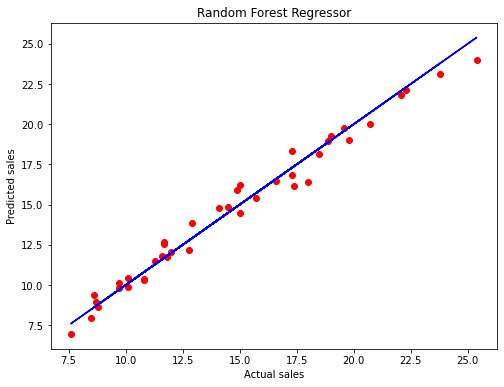

In [145]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Random Forest Regressor')
plt.show()

Our model is performing very well as the model accuracy and cross validation both are 97%. 

RMSE and MAE values are also very low.

Best fit line is covering most of the datapoints which shows a good fit.

In [144]:
#Saving our model
import joblib
joblib.dump(rf,'Sales_prediction_rf.obj')

['Sales_prediction_rf.obj']